## <center> JUEGO DE LA VIDA </center>##

**Historia**


El juego de la vida es un autómata celular diseñado por el matemático británico John Horton Conway en 1970.

Hizo su primera aparición pública en el número de octubre de 1970 de la revista Scientific American, en la columna de juegos matemáticos de Martin Gardner. Desde un punto de vista teórico, es interesante porque es equivalente a una máquina universal de Turing, es decir, todo lo que se puede computar algorítmicamente se puede computar en el juego de la vida.

Desde su publicación, ha atraído mucho interés debido a la gran variabilidad de la evolución de los patrones. Se considera que la vida es un buen ejemplo de emergencia y autoorganización. Es interesante para los científicos, matemáticos, economistas y otros observar cómo patrones complejos pueden provenir de la implementación de reglas muy sencillas.

La vida tiene una variedad de patrones reconocidos que provienen de determinadas posiciones iniciales. Poco después de la publicación, se descubrieron el pentaminó R, el planeador o caminador, lo que atrajo un mayor interés hacia el juego.

## Reglas ##


1. Cualquier célula con menos de 2 vecinos muere, por soledad.
2. Cualquier célula con 2 a 3 vecinos sobrevive.
3. Cualquier célula con más de 3 vecinos muere, por sobre población.
4. En los espacios con exactamente 3 vecinos, nace una nueva célula.

**Ejemplo de Aplicación**

**Formulacion de Problema**
Usar las reglas del juego de la vida y aplicarlas en dos muestras.Para el ejemplo se a tomado  como muestras dos ángulos uno de 90°  y otro de 45° los mismos que se encuentran representados por celulas vivas(numero 1) y celulas muertas(numero 0).  

**Plan de Experimentacion** 
Se tienen implementados dos angulos de diferentes medidas. 
Para la representacion de un ángulo de 90° se han graficado 61 celulas y 195 celulas muertas.
Para la representacion del ángulo de 45° se han tomado 55 celulas vivas y 201 celulas muertas.


**Figura a aplicar**


<img src="2.png">
<center>Ángulo de 90%</center>

<IPython.core.display.Javascript object>


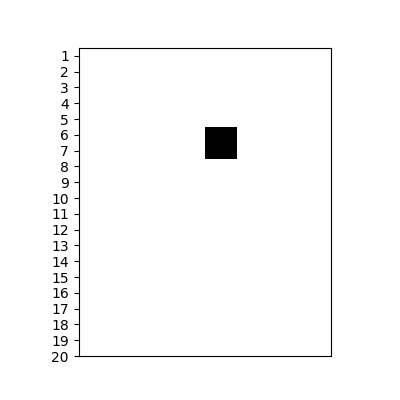

In [3]:
from time import sleep

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation

import random
from matplotlib.widgets import Button
%matplotlib notebook
def vecindario(b):
    """Array de células vivas en el vecindario."""
    vecindario = (
        np.roll(np.roll(b, 1, 1), 1, 0) +  # Abajo-derecha
        np.roll(b, 1, 0) +  # Abajo
        np.roll(np.roll(b, -1, 1), 1, 0) +  # Abajo-izquierda
        np.roll(b, -1, 1) +  # Izquierda
        np.roll(np.roll(b, -1, 1), -1, 0) +  # Arriba-izquierda
        np.roll(b, -1, 0) +  # Arriba
        np.roll(np.roll(b, 1, 1), -1, 0) +  # Arriba-derecha
        np.roll(b, 1, 1)  # Derecha
    )
    return vecindario




def paso(b):
    """Paso en el juego de la vida de Conway."""
    v = vecindario(b)
    buffer_b = b.copy()  # Hacemos una copia de la matriz
    for i in range(buffer_b.shape[0]):
        for j in range(buffer_b.shape[1]):
            if v[i, j] == 3 or (v[i, j] == 2 and buffer_b[i, j]):
                buffer_b[i, j] = 1
            else:
                buffer_b[i, j] = 0
    return buffer_b


# Parámetros del problema
GENERACIONES = 50
N = 20 # Dimensiones del tablero (N, M)
M = 20

pause = False # Pausa

def onClick(event):
    global pause
    pause ^= True

# Construimos el tablero
tablero = np.zeros((N, M), dtype = int)

# CONDICIONES INICIALES (CASILLAS ENCENDIDAS)
#   Añadimos una nave 
tablero=np.array(
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

def randomize(event):
    for i in range(0, N-1):
        for j in range(0, N-1):
            tablero[i, j] = random.randint(0, 1)
    global b
    b = tablero
    imagen.set_data(b)
    print(tablero)

# Creamos la figura, formateo diverso
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
# ax.axis('off')
b = tablero 
imagen = ax.imshow(b, interpolation="none", aspect = "equal", cmap=cm.gray_r)

# Major ticks
# ax.set_xticks(np.arange(0, N, 1));
ax.set_yticks(np.arange(0, N, 1));

# Labels for major ticks
# ax.set_xticklabels(np.arange(1, N+1, 1));
ax.set_yticklabels(np.arange(1, N+1, 1));

# Minor ticks
# ax.set_xticks(np.arange(-.5, N, 1), minor=True);
# ax.set_yticks(np.arange(-.5, N, 1), minor=True);

plt.tick_params(    
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

def animate(i):
    global b

    if not pause: # Pause check
        print(i) # El parámetro de avance: la pausa no le afecta
        b = paso(b) # Iteramos la animación
        
        imagen.set_data(b)
    
    return imagen,


# Animacion 
anim = animation.FuncAnimation(fig, animate, frames=GENERACIONES, blit=True, interval = 800, repeat = True)
plt.show()

**Figura a aplicar**
<img src="1.png">
<center>Ángulo de 45%</center>

<IPython.core.display.Javascript object>


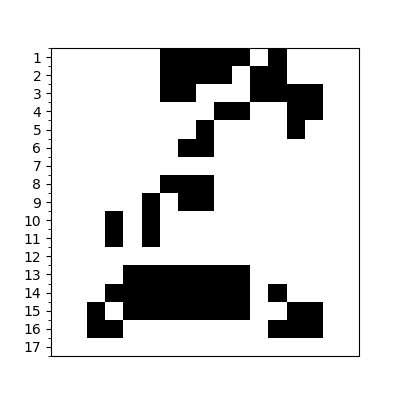

In [8]:
from time import sleep

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation

import random
from matplotlib.widgets import Button
%matplotlib notebook

def vecindario(b):
    """Array de células vivas en el vecindario."""
    vecindario = (
        np.roll(np.roll(b, 1, 1), 1, 0) +  # Abajo-derecha
        np.roll(b, 1, 0) +  # Abajo
        np.roll(np.roll(b, -1, 1), 1, 0) +  # Abajo-izquierda
        np.roll(b, -1, 1) +  # Izquierda
        np.roll(np.roll(b, -1, 1), -1, 0) +  # Arriba-izquierda
        np.roll(b, -1, 0) +  # Arriba
        np.roll(np.roll(b, 1, 1), -1, 0) +  # Arriba-derecha
        np.roll(b, 1, 1)  # Derecha
    )
    return vecindario




def paso(b):
    """Paso en el juego de la vida de Conway."""
    v = vecindario(b)
    buffer_b = b.copy()  # Hacemos una copia de la matriz
    for i in range(buffer_b.shape[0]):
        for j in range(buffer_b.shape[1]):
            if v[i, j] == 3 or (v[i, j] == 2 and buffer_b[i, j]):
                buffer_b[i, j] = 1
            else:
                buffer_b[i, j] = 0
    return buffer_b


# Parámetros del problema
GENERACIONES = 50
N = 17 # Dimensiones del tablero (N, M)
M = 12

pause = False # Pausa

def onClick(event):
    global pause
    pause ^= True

# Construimos el tablero
tablero = np.zeros((N, M), dtype = int)

# CONDICIONES INICIALES (CASILLAS ENCENDIDAS)
#   Añadimos una nave 
tablero=np.array(
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

def randomize(event):
    for i in range(0, N-1):
        for j in range(0, N-1):
            tablero[i, j] = random.randint(0, 1)
    global b
    b = tablero
    imagen.set_data(b)
    print(tablero)

# Creamos la figura, formateo diverso
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
#ax.axis('off')
b = tablero 
imagen = ax.imshow(b, interpolation="none", aspect = "equal", cmap=cm.gray_r)

# Major ticks
#ax.set_xticks(np.arange(0, N, 1));
#ax.set_yticks(np.arange(0, N, 1));

# Labels for major ticks ax.set_xticklabels(np.arange(1, N+1, 1));
ax.set_yticklabels(np.arange(1, N+1, 1));

# Minor ticks
ax.set_xticks(np.arange(-.5, N, 1), minor=True);
ax.set_yticks(np.arange(-.5, N, 1), minor=True);

plt.tick_params(    
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

def animate(i):
    global b

    if not pause: # Pause check
        print(i) # El parámetro de avance: la pausa no le afecta
        b = paso(b) # Iteramos la animación
        
        imagen.set_data(b)
    
    return imagen,


# Animacion 
anim = animation.FuncAnimation(fig, animate, frames=GENERACIONES, blit=True, interval = 800, repeat = True)
plt.show()

**Ejemplo de Aplicación**
En la animación anterior se observo  61 interaciones quedando 8 celulas vivas.

**Prueba de  ángulo de 45° con 49 celulas vivas**

<IPython.core.display.Javascript object>


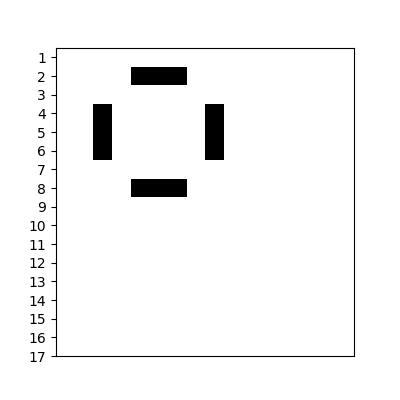

In [7]:
from time import sleep

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation

import random
from matplotlib.widgets import Button

def vecindario(b):
    """Array de células vivas en el vecindario."""
    vecindario = (
        np.roll(np.roll(b, 1, 1), 1, 0) +  # Abajo-derecha
        np.roll(b, 1, 0) +  # Abajo
        np.roll(np.roll(b, -1, 1), 1, 0) +  # Abajo-izquierda
        np.roll(b, -1, 1) +  # Izquierda
        np.roll(np.roll(b, -1, 1), -1, 0) +  # Arriba-izquierda
        np.roll(b, -1, 0) +  # Arriba
        np.roll(np.roll(b, 1, 1), -1, 0) +  # Arriba-derecha
        np.roll(b, 1, 1)  # Derecha
    )
    return vecindario




def paso(b):
    """Paso en el juego de la vida de Conway."""
    v = vecindario(b)
    buffer_b = b.copy()  # Hacemos una copia de la matriz
    for i in range(buffer_b.shape[0]):
        for j in range(buffer_b.shape[1]):
            if v[i, j] == 3 or (v[i, j] == 2 and buffer_b[i, j]):
                buffer_b[i, j] = 1
            else:
                buffer_b[i, j] = 0
    return buffer_b


# Parámetros del problema
GENERACIONES = 50
N = 17 # Dimensiones del tablero (N, M)
M = 12

pause = False # Pausa

def onClick(event):
    global pause
    pause ^= True

# Construimos el tablero
tablero = np.zeros((N, M), dtype = int)

# CONDICIONES INICIALES (CASILLAS ENCENDIDAS)
#   Añadimos una nave 
tablero=np.array(
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

def randomize(event):
    for i in range(0, N-1):
        for j in range(0, N-1):
            tablero[i, j] = random.randint(0, 1)
    global b
    b = tablero
    imagen.set_data(b)
    print(tablero)

# Creamos la figura, formateo diverso
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
# ax.axis('off')
b = tablero 
imagen = ax.imshow(b, interpolation="none", aspect = "equal", cmap=cm.gray_r)

# Major ticks
# ax.set_xticks(np.arange(0, N, 1));
ax.set_yticks(np.arange(0, N, 1));

# Labels for major ticks
# ax.set_xticklabels(np.arange(1, N+1, 1));
ax.set_yticklabels(np.arange(1, N+1, 1));

# Minor ticks
# ax.set_xticks(np.arange(-.5, N, 1), minor=True);
# ax.set_yticks(np.arange(-.5, N, 1), minor=True);

plt.tick_params(    
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

def animate(i):
    global b

    if not pause: # Pause check
        print(i) # El parámetro de avance: la pausa no le afecta
        b = paso(b) # Iteramos la animación
        
        imagen.set_data(b)
    
    return imagen,


# Animacion 
anim = animation.FuncAnimation(fig, animate, frames=GENERACIONES, blit=True, interval = 800, repeat = True)
plt.show()

En el ejemplo anterior se muestra la animación del angulo de 45 grados con 49 celulas vivas , en la ultima etapa las interaciones se vuelven repetitivas e infinitas.



**Conclusión**

Según los análisis anteriores podemos decir que a pesar de que las figuras representadas tenian diferente tamaño en grados pero casi el mismo número de celulas muertas , el resultado de celulas muertas fue el mismo pero en diferente área de plano cartesiano.
En el segundo caso se comparó los dos ángulos de 45° pero con diferentes número de celulas vivas en donde con menor número de celulas se obtuvo un resultado de transacíones repetitivas.
